In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#data reading
df = pd.read_csv('/content/drive/MyDrive/DTSC 710 - Final Project/(Target)Heart_Disease_Prediction.csv')
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Target'],
      dtype='object')

In [ ]:
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# get general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Target                   270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
# check for null elements in coloumns
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Target                     0
dtype: int64

In [ ]:
# check for duplicate rows
df.duplicated().sum() 

0

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.describe(include='object')

,Target
count,270
unique,2
top,Absence
freq,150


In [ ]:
df['Target'].value_counts()

Absence     150
Presence    120
Name: Target, dtype: int64

In [ ]:
#@title for visualization
import seaborn as sns

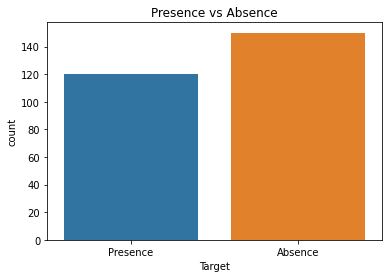

In [ ]:
plt.title('Presence vs Absence')
sns.countplot(x='Target', data=df)

In [ ]:
#list of the coloumn names
df_cols = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Target']

In [ ]:
for col in df_cols:
  print(col, '({})'.format(df[col].nunique(), ':')) #Count number of distinct elements in specified axis (0-row wise, 1- coloumn wise)
  print(pd.crosstab(df['Target'], df[col]))
  print()

Age (41)
Age       29  34  35  37  38  39  40  41  42  43  ...  65  66  67  68  69  70  \
Target                                            ...                           
Absence    1   2   1   2   0   2   1   8   7   5  ...   4   3   3   2   2   1   
Presence   0   0   2   0   1   1   2   1   1   2  ...   4   3   5   1   1   3   

Age       71  74  76  77  
Target                    
Absence    3   1   1   0  
Presence   0   0   0   1  

[2 rows x 41 columns]

Sex (2)
Sex        0    1
Target           
Absence   67   83
Presence  20  100

Chest pain type (4)
Chest pain type   1   2   3   4
Target                         
Absence          15  35  62  38
Presence          5   7  17  91

BP (47)
BP        94   100  101  102  104  105  106  108  110  112  ...  158  160  \
Target                                                      ...             
Absence     2    2    1    2    1    3    1    4    8    5  ...    0    5   
Presence    0    2    0    0    0    0    0    2    9    4  ...  

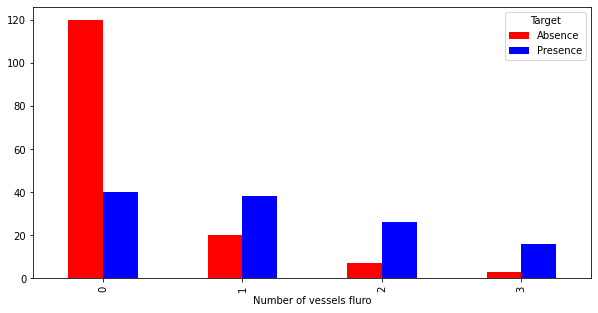

In [ ]:
#@title seeing it visually
pd.crosstab( df['Number of vessels fluro'], df['Target']).plot(kind ="bar", figsize = (10,5), color = ["red","blue"])

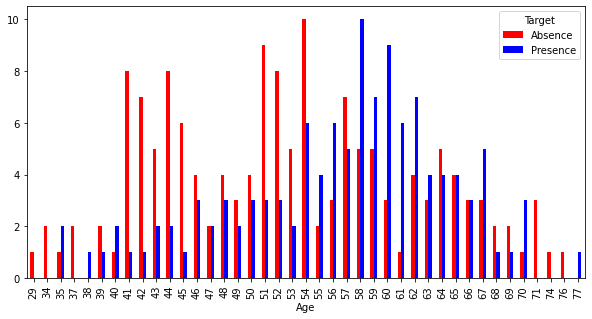

In [ ]:
pd.crosstab( df['Age'], df['Target']).plot(kind ="bar", figsize = (10,5), color = ["red","blue"])

In [ ]:
df.Target.replace(('Presence', 'Absence'), (1, 0), inplace=True)
#Chnaging Presense and Absense to 0 and 1

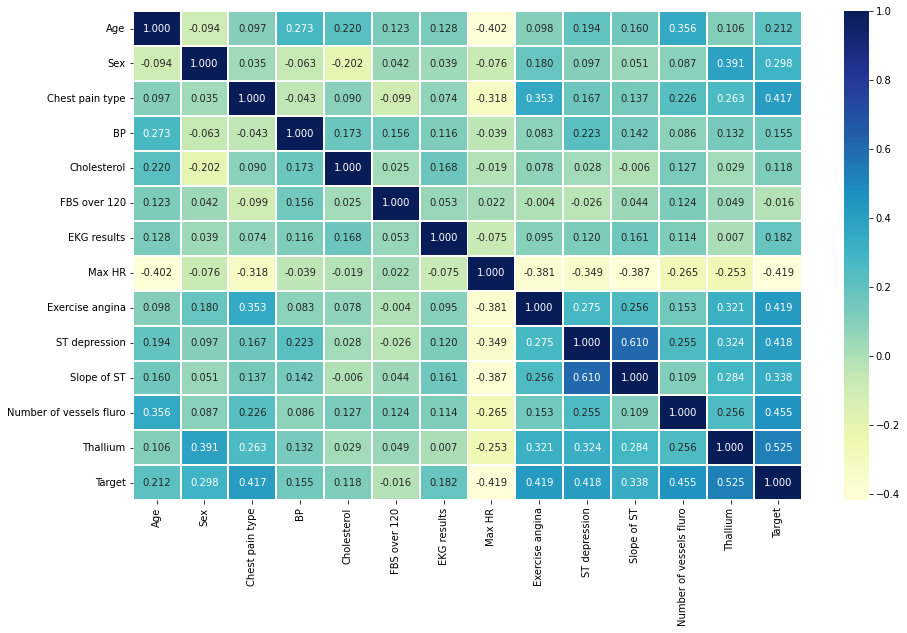

In [ ]:
import seaborn as sns 
cor_matrix = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(cor_matrix,annot = True,linewidth = 1,fmt= ".3f", cmap="YlGnBu")

In [ ]:
#@title Notes:
'''
good chances of finding something interesting in:
1. ST depression VS slope,
2. sex VS thallium,
3. and Exercise angia VS chest pain type


'''

'\ngood chances of finding something interesting in:\n1. ST depression VS slope,\n2. sex VS thallium,\n3. and Exercise angia VS chest pain type\n\n\n'

In [ ]:
from sklearn.model_selection import train_test_split

# machine learning models : SVM, Naive Bayes, Decision tree, Logistic regression, random forest, KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans # this is extra
# machine learning metrices
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model,X,y):
  # Use learning curve to get training and test scores along with train sizes
  #
  train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y,
                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                      n_jobs=1)
  #
  # Calculate training and test mean and std
  #
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  #
  # Plot the learning curve
  #
  print(str(model))
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Test Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title('Learning Curve')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

In [ ]:
# for the ease of producing the classification reports
def report(name, model, df):
  X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, : -1],df.iloc[: , -1], random_state = 50, test_size = 0.3)
  model = model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print( name + '\n' + classification_report(y_pred,y_test))
  plot_learning_curve(model,X_test,y_test)
  #plot_confusion_matrix(model,X_test,y_test)


SVM
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        59
           1       0.42      0.59      0.49        22

    accuracy                           0.67        81
   macro avg       0.62      0.64      0.62        81
weighted avg       0.71      0.67      0.68        81

SVC()


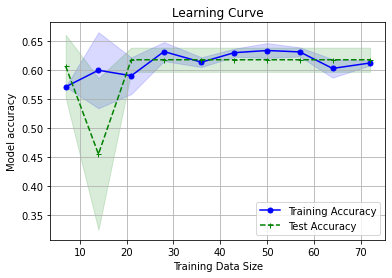

Naive Bayes
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        52
           1       0.74      0.79      0.77        29

    accuracy                           0.83        81
   macro avg       0.81      0.82      0.81        81
weighted avg       0.83      0.83      0.83        81

GaussianNB()


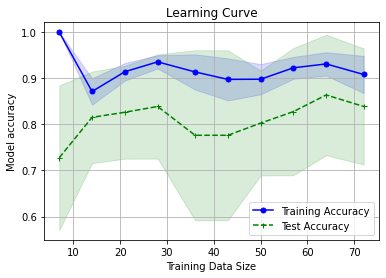


Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        52
           1       0.68      0.72      0.70        29

    accuracy                           0.78        81
   macro avg       0.76      0.77      0.76        81
weighted avg       0.78      0.78      0.78        81

DecisionTreeClassifier()


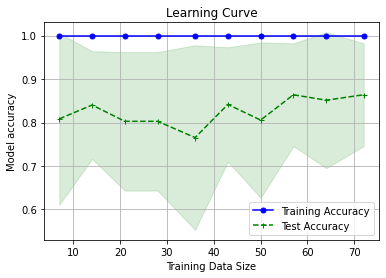

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che


Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        52
           1       0.74      0.79      0.77        29

    accuracy                           0.83        81
   macro avg       0.81      0.82      0.81        81
weighted avg       0.83      0.83      0.83        81



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression()


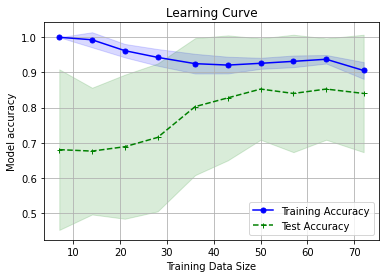


Random Forest
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        55
           1       0.68      0.81      0.74        26

    accuracy                           0.81        81
   macro avg       0.79      0.81      0.80        81
weighted avg       0.83      0.81      0.82        81

RandomForestClassifier()


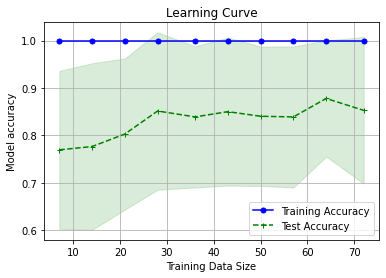


KNN
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        56
           1       0.52      0.64      0.57        25

    accuracy                           0.70        81
   macro avg       0.67      0.69      0.67        81
weighted avg       0.73      0.70      0.71        81

KNeighborsClassifier()


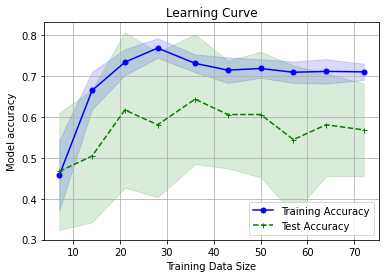

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



KMeans
              precision    recall  f1-score   support

           0       0.16      0.62      0.25        13
           1       0.10      0.23      0.14        13
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        15

    accuracy                           0.14        81
   macro avg       0.03      0.11      0.05        81
weighted avg       0.04      0.14      0.06        81

KMeans(max_iter=100)


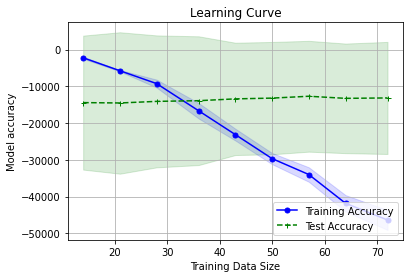

In [ ]:
report('\nSVM', SVC(), df)
report('Naive Bayes', GaussianNB(), df)
report('\nDecision Tree', DecisionTreeClassifier(), df)
report('\nLogistic Regression', LogisticRegression(), df)
report('\nRandom Forest', RandomForestClassifier(), df)
report('\nKNN', KNeighborsClassifier(), df)
report('\nKMeans', KMeans(max_iter =100), df)
# might need to pipeline 